In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
#Step 1 - Data Collection
df = pd.read_csv(r"C:\Users\J\Documents\Data_Analyst\Projects\linearregression\insurance.csv")

In [32]:
#Step 2 - Data Cleaning
age_raw = df["age"].tolist()
price_raw = df["charges"].tolist()
age_input = np.array(age_raw)
price_output = np.array(price_raw)

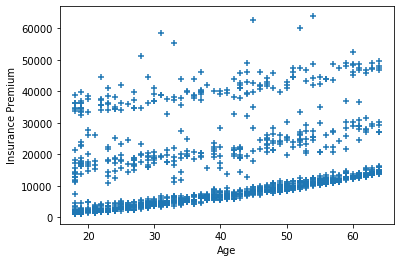

In [33]:
#Plotting the graph
%matplotlib inline
plt.scatter(age_input, price_output, marker = "+")
plt.xlabel('Age')
plt.ylabel('Insurance Premium')
plt.show()

In [34]:
#Defining the cost function
#for me - numpy has no concept for row and column vectors, so (n,1) imitates columns and (1,n) imitates rows
#np.dot is what I used to multiply the matrices parameters and input variables(age)
#y hat = theta transposed * x bar (all x inputs)

def compute_cost(age_input, price_output, params):
    m = len(age_input)
    cost_sum = 0.0
    for x, y in zip(age_input, price_output):
        y_hat = np.dot(params, np.array([1.0, x]))
        cost_sum += (y_hat - y) ** 2
    
    cost = cost_sum / (m * 2)
    return cost

In [35]:
#Linear Regression batch gradient descent - so doing step by step training in order (simultaneous replacement)
#max_iterations means how many total steps I take to get (close enough) to the critical point
#np.zeros returns an array of zeros with shape and type of input
#my derivative J is the gradient variable
#np.zeros for both cost and params_store returns 2 empty arrays that is the length of the number of iterations
#empty arrays are just for storage

#second step computes the "Cost - J" for each iteration with each parameter (interept theta)

#third step does the multiplying and replacing new theta with old theta

def lin_reg_batch(age_input, price_output, params, alpha, max_iterations):
    iteration = 0
    m = len(age_input)
    cost = np.zeros(max_iterations)
    params_store = np.zeros([2, max_iterations])
    
    while iteration < max_iterations:
        cost[iteration] = compute_cost(age_input, price_output, params)
        params_store[:, iteration] = params
        
        print('============================')
        print(f'Iteration #: {iteration}')
        print(f'Cost: {cost[iteration]}')
        
        for x, y in zip(age_input, price_output):
            y_hat = np.dot(params, np.array([1.0, x]))
            gradient = np.array([1.0, x]) * (y_hat - y)
            params = params - alpha * (gradient / m)
            
            #Alternatively:
            #gradient = np.array([1.0, x]) * (y - y_hat)
            #params += alpha * (gradient / m)
        
        iteration += 1
    
    return params, cost, params_store

In [36]:
#Step 3 - Training the model using scikitlearn
#train test split lets me split data up into training and evaluation

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(age_input, price_output, test_size = 0.20)

In [37]:
#Running the algorithm for Batch GD
params_batch = np.array([20.0, 80.0])
alpha_batch = 1e-3
max_iterations = 1000
params_hat_batch, cost_batch, params_store_batch =\
lin_reg_batch(x_train, y_train, params_batch, alpha_batch, max_iterations)

Iteration #: 0
Cost: 126003318.7516728
Iteration #: 1
Cost: 71329429.88449001
Iteration #: 2
Cost: 69983593.08058393
Iteration #: 3
Cost: 69994617.12752068
Iteration #: 4
Cost: 70003758.27747323
Iteration #: 5
Cost: 70005445.2267202
Iteration #: 6
Cost: 70005625.57331885
Iteration #: 7
Cost: 70005538.29835229
Iteration #: 8
Cost: 70005404.45784222
Iteration #: 9
Cost: 70005262.56534493
Iteration #: 10
Cost: 70005119.30382371
Iteration #: 11
Cost: 70004975.83210678
Iteration #: 12
Cost: 70004832.35110646
Iteration #: 13
Cost: 70004688.89564952
Iteration #: 14
Cost: 70004545.47176832
Iteration #: 15
Cost: 70004402.08050224
Iteration #: 16
Cost: 70004258.72202541
Iteration #: 17
Cost: 70004115.39636181
Iteration #: 18
Cost: 70003972.10350949
Iteration #: 19
Cost: 70003828.84346145
Iteration #: 20
Cost: 70003685.61621098
Iteration #: 21
Cost: 70003542.42175013
Iteration #: 22
Cost: 70003399.26007159
Iteration #: 23
Cost: 70003256.13116789
Iteration #: 24
Cost: 70003113.03503148
Iteration #

In [38]:
#Same as Batch but no looping over iterations, but instead looping over the data set itself
#Compute y_hat, compute the gradient, and update the parameter

def lin_reg_stoch(age_input, price_output, params, alpha):
    m = len(age_input)
    cost = np.zeros(m)
    params_store = np.zeros([2, m])
    
    iteration = 0
    for x, y in zip(age_input, price_output):
        cost[iteration] = compute_cost(age_input, price_output, params)
        params_store[:, iteration] = params
        
        print('============================')
        print(f'Iteration #: {iteration}')
        print(f'Cost: {cost[iteration]}')
        
        y_hat = np.dot(params, np.array([1.0, x]))
        gradient = np.array([1.0, x]) * (y_hat - y)
        params = params - alpha * (gradient / m)
        
        #gradient = np.array([1.0, x]) * (y - y_hat)
        #params += alpha * (gradient / m)
        
        iteration += 1
    
    return params, cost, params_store

In [39]:
#Running the algorithm for Stoch GD
alpha_stoch = 1e-3
params_stoch = np.array([20.0, 80.0])
params_hat_stoch, cost, params_store =\
    lin_reg_stoch(x_train, y_train, params_stoch, alpha_stoch)

Iteration #: 0
Cost: 126003318.7516728
Iteration #: 1
Cost: 126005768.48381081
Iteration #: 2
Cost: 125834855.0672702
Iteration #: 3
Cost: 125825722.87425235
Iteration #: 4
Cost: 125817960.59490088
Iteration #: 5
Cost: 125808671.56001225
Iteration #: 6
Cost: 125570258.57874592
Iteration #: 7
Cost: 125546444.614865
Iteration #: 8
Cost: 125495278.6059045
Iteration #: 9
Cost: 125262751.20912881
Iteration #: 10
Cost: 125259766.81420252
Iteration #: 11
Cost: 125182799.76325698
Iteration #: 12
Cost: 124870301.71298692
Iteration #: 13
Cost: 124816431.33668053
Iteration #: 14
Cost: 124761796.93625017
Iteration #: 15
Cost: 124487345.64579877
Iteration #: 16
Cost: 123188932.60203457
Iteration #: 17
Cost: 123154852.00235544
Iteration #: 18
Cost: 123154441.1514156
Iteration #: 19
Cost: 123150498.5597533
Iteration #: 20
Cost: 123135543.24196017
Iteration #: 21
Cost: 123039281.1935761
Iteration #: 22
Cost: 122907011.45336534
Iteration #: 23
Cost: 122885690.31378876
Iteration #: 24
Cost: 122724347.88

Batch Theta 0 (Intercept): 384.65926917735266
Batch Theta 1 (Slope): 330.49023702685963
Stoch Theta 0 (Intercept): 25.226297961362278
Stoch Theta 1 (Slope): 293.67661880696045
Batch Root Mean Square: 11691.550793426057
Stoch Root Mean Square: 11597.008859260615


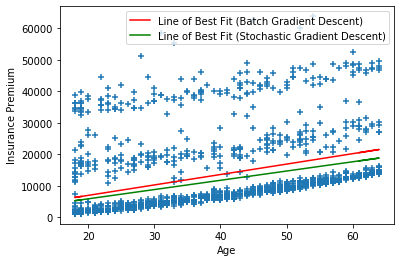

In [40]:
#params_hat_batch[0] is intercept, params_hat_batch[1] is slope - * age_input is the "mx" in "mx + b"
#RMS takes the square of the error - "how good" the line of best fit fits the data set - lower the better
#My slopes and intercepts change as I increase the 'max_iterations' variable because with more iterations, 
#the model is able to find a more "correct" lowest J value

plt.scatter(age_input, price_output, marker = "+")
plt.plot(age_input, params_hat_batch[0] + params_hat_batch[1]*age_input, 'r', label = 'Line of Best Fit (Batch Gradient Descent)')
plt.plot(age_input, params_hat_stoch[0] + params_hat_stoch[1]*age_input, 'g', label = 'Line of Best Fit (Stochastic Gradient Descent)')
plt.xlabel('Age')
plt.ylabel('Insurance Premium')
plt.legend()
plt.show

print(f'Batch Theta 0 (Intercept): {params_hat_batch[0]}') 
print(f'Batch Theta 1 (Slope): {params_hat_batch[1]}')
print(f'Stoch Theta 0 (Intercept): {params_hat_stoch[0]}') 
print(f'Stoch Theta 1 (Slope): {params_hat_stoch[1]}')

rms_batch = np.sqrt(np.mean(np.square(params_hat_batch[0] + params_hat_batch[1]*age_input - price_output)))
rms_stoch = np.sqrt(np.mean(np.square(params_hat_stoch[0] + params_hat_stoch[1]*age_input - price_output)))
print(f'Batch Root Mean Square: {rms_stoch}')
print(f'Stoch Root Mean Square: {rms_batch}')